In [1]:
import torch
import torch.nn as nn
from torch import optim
from models.utils import train_step, generate_and_save_images
from models.GAN_model import Generator, Discriminator
from models.transformer import TransformDataset
from datasets import load_dataset
from tqdm import tqdm


In [2]:
img_shape = (3, 28, 28)  # форма изображений (3 канала, 28 на 28 пикселей)
noise_len = 100  # размер входного вектора шума
batch_size = 32 # размер батча
epochs = 100 # количество эпох

In [3]:
device = ''
if torch.cuda.is_available():
    device = 'cuda'
    print('Обучаемся на gpu!')
else:
    device = 'cpu'
    print('обучаемся на cpu(')

Обучаемся на gpu!


In [4]:
loss_func = nn.BCELoss()
generator = Generator(noise_len).to(device)
discriminator = Discriminator().to(device)

optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [5]:
train_dataset = load_dataset("iamkaikai/amazing_logos", split='train') # загрузка датасета

In [6]:
train_dataset = TransformDataset(train_dataset, new_size=(28, 28)) # преобразование датасета
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [7]:
optimizers = (optimizer_D, optimizer_G)
models = (discriminator, generator)

100%|██████████| 215/215 [00:47<00:00,  4.54it/s]


Epoch [0/100]/nD_loss: 0.4267, G_loss: 2.3522


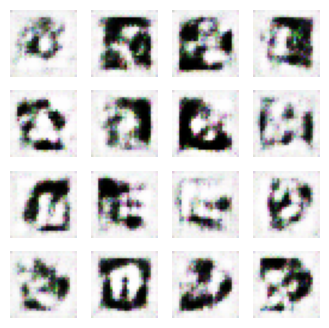

100%|██████████| 215/215 [00:44<00:00,  4.78it/s]


Epoch [5/100]/nD_loss: 0.3940, G_loss: 3.8132


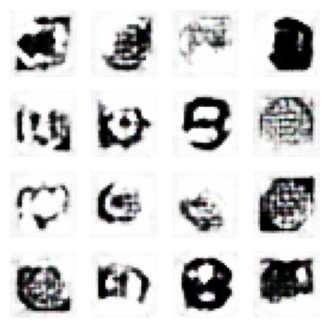

100%|██████████| 215/215 [00:43<00:00,  4.98it/s]


Epoch [10/100]/nD_loss: 0.5901, G_loss: 1.3221


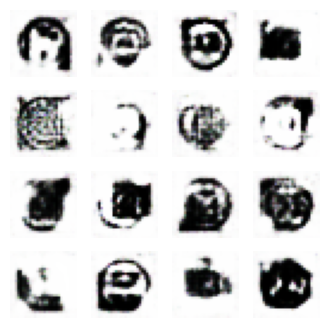

100%|██████████| 215/215 [00:43<00:00,  4.96it/s]


Epoch [15/100]/nD_loss: 0.0765, G_loss: 3.8952


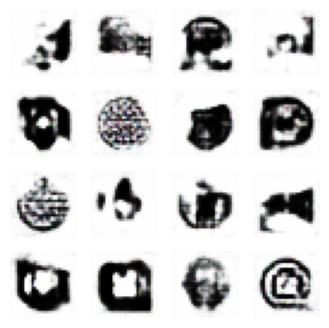

100%|██████████| 215/215 [00:43<00:00,  4.90it/s]


Epoch [20/100]/nD_loss: 0.2483, G_loss: 4.3155


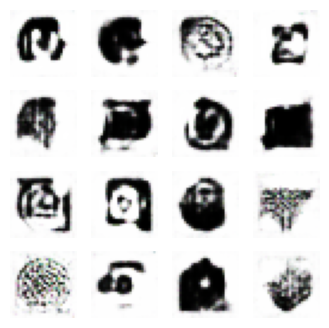

100%|██████████| 215/215 [00:48<00:00,  4.44it/s]


Epoch [25/100]/nD_loss: 0.1220, G_loss: 3.9264


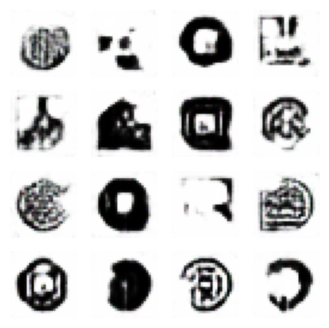

100%|██████████| 215/215 [00:47<00:00,  4.50it/s]


Epoch [30/100]/nD_loss: 0.2610, G_loss: 1.8950


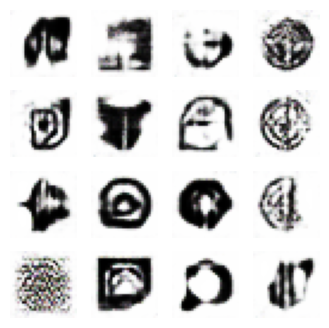

100%|██████████| 215/215 [00:48<00:00,  4.41it/s]


Epoch [35/100]/nD_loss: 0.1333, G_loss: 3.3094


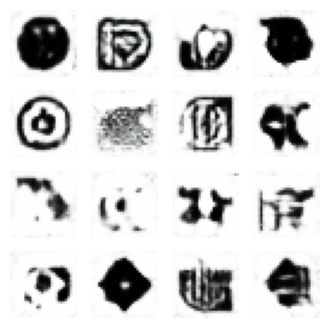

100%|██████████| 215/215 [00:52<00:00,  4.13it/s]


Epoch [40/100]/nD_loss: 0.1253, G_loss: 3.5524


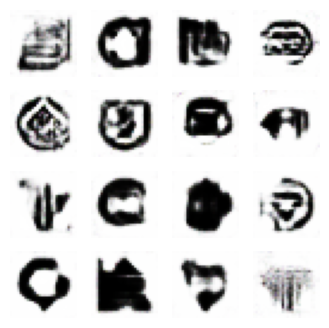

100%|██████████| 215/215 [00:47<00:00,  4.52it/s]


Epoch [45/100]/nD_loss: 0.1748, G_loss: 3.6053


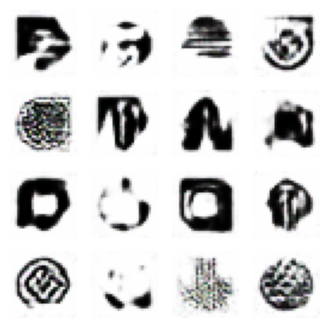

100%|██████████| 215/215 [01:24<00:00,  2.54it/s]


Epoch [50/100]/nD_loss: 0.0321, G_loss: 4.7456


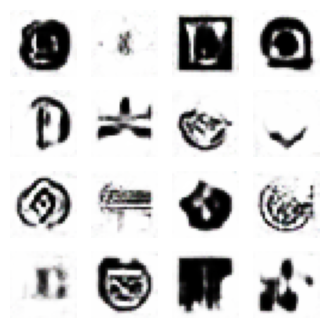

100%|██████████| 215/215 [00:54<00:00,  3.98it/s]


Epoch [55/100]/nD_loss: 0.4862, G_loss: 5.8273


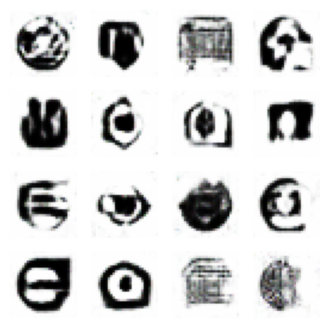

100%|██████████| 215/215 [01:06<00:00,  3.22it/s]


Epoch [60/100]/nD_loss: 0.0160, G_loss: 5.6181


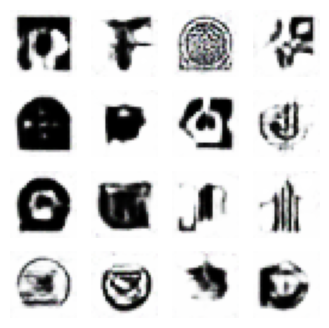

100%|██████████| 215/215 [00:44<00:00,  4.82it/s]


Epoch [65/100]/nD_loss: 0.1125, G_loss: 4.1300


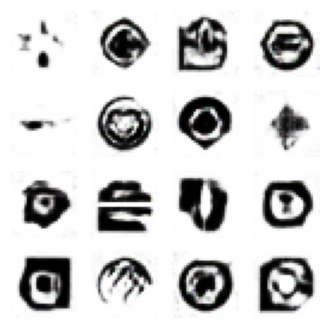

100%|██████████| 215/215 [00:42<00:00,  5.04it/s]


Epoch [70/100]/nD_loss: 0.0751, G_loss: 4.0477


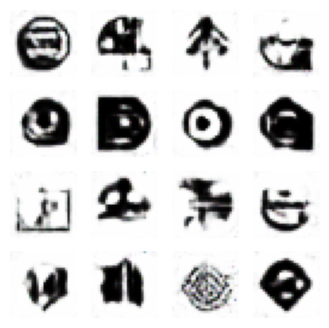

100%|██████████| 215/215 [00:46<00:00,  4.66it/s]


Epoch [75/100]/nD_loss: 0.0440, G_loss: 5.1639


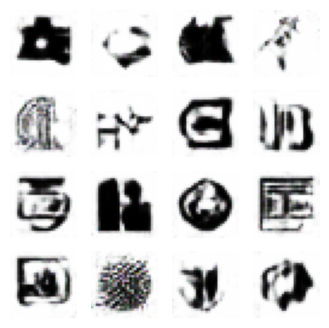

100%|██████████| 215/215 [00:40<00:00,  5.37it/s]


Epoch [80/100]/nD_loss: 0.0189, G_loss: 6.1727


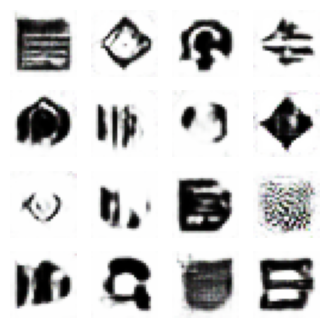

100%|██████████| 215/215 [00:42<00:00,  5.01it/s]


Epoch [85/100]/nD_loss: 0.0203, G_loss: 5.2991


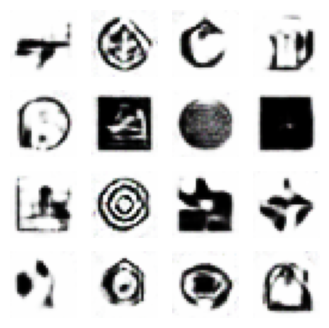

100%|██████████| 215/215 [00:41<00:00,  5.18it/s]


Epoch [90/100]/nD_loss: 0.0690, G_loss: 4.8238


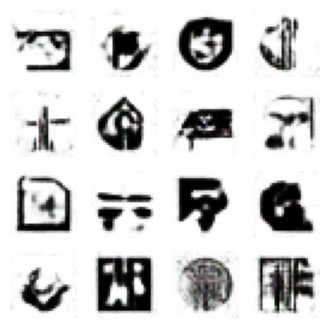

100%|██████████| 215/215 [00:46<00:00,  4.61it/s]


Epoch [95/100]/nD_loss: 0.0427, G_loss: 4.0845


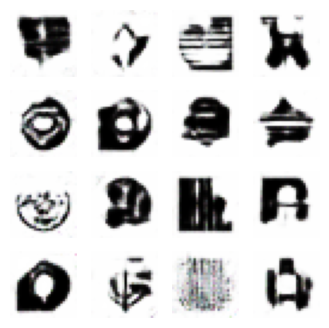

100%|██████████| 215/215 [00:46<00:00,  4.66it/s]


In [8]:
for epoch in range(epochs):
    for real_images in tqdm(train_loader):
        d_loss, g_loss = train_step(real_images, noise_len, optimizers, models, loss_func, device)

    if epoch % 5 == 0:
        print(f"Epoch [{epoch}/{epochs}]/nD_loss: {d_loss:.4f}, G_loss: {g_loss:.4f}")
        generate_and_save_images(generator, epoch, noise_len, device)